In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=1000000, n_features=2,
                           centers=2, cluster_std=0.3126,
                           random_state=2071962)
print(y)

In [11]:
y[y == 0] = -1
y

array([-1,  1, -1, ...,  1, -1, -1])

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

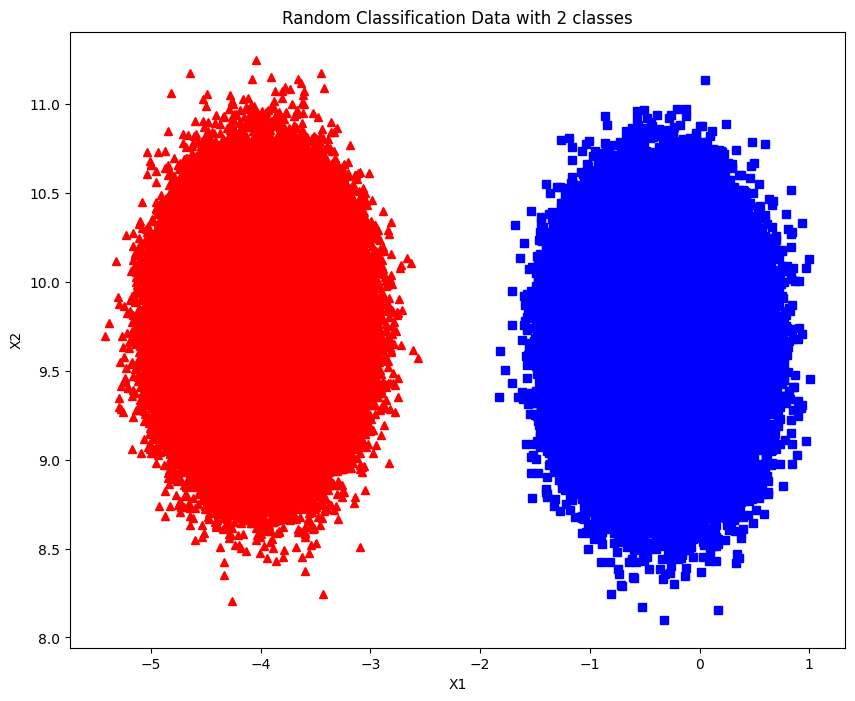

In [12]:
#Plotting
fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

In [13]:
m, n = X.shape
print(m, n)

1000000 2


In [15]:
theta = np.random.rand(3, 1)
theta

array([[0.06614532],
       [0.83179712],
       [0.57399864]])

In [16]:
X_mat = np.ones((m, n + 1))
X_mat[:, 1:] = X
X_mat

array([[ 1.        , -4.02787781, 10.02304492],
       [ 1.        , -0.12171014,  9.30316769],
       [ 1.        , -4.04508845,  9.51529884],
       ...,
       [ 1.        , -0.14352743,  9.68534435],
       [ 1.        , -3.71306148,  9.68491396],
       [ 1.        , -3.8224813 ,  9.9236526 ]])

In [17]:
def perceptron_v1(X_mat, y, theta, max_epochs):
    num_epochs = 0
    num_errors = 1

    while num_epochs <= max_epochs and num_errors > 0:

        num_epochs += 1
        num_errors = 0
        for i, X_i in enumerate(X_mat):
            X_i = X_i.reshape(1, n + 1)
            if np.dot(X_i, theta) * y[i] <= 0:
                theta += X_i.T * y[i]
                num_errors += 1

    return theta, num_epochs


perceptron_v1(X_mat, y, theta, 100)

(array([[ 1.06614532],
        [37.28610837],
        [ 8.86259361]]),
 2)

In [18]:
def perceptron_predict(X_mat, theta):
    y_pred = np.dot(X_mat, theta)
    y_pred[y_pred > 0] = 1
    y_pred[y_pred <= 0] = -1
    return y_pred.flatten()


y_pred = perceptron_predict(X_mat, theta)
y_pred

array([-1.,  1., -1., ...,  1., -1., -1.])

In [20]:
def accuracy_score(y, y_pred):
    return np.sum(y_pred - y == 0) / len(y)


accuracy_score(y, y_pred)

1.0

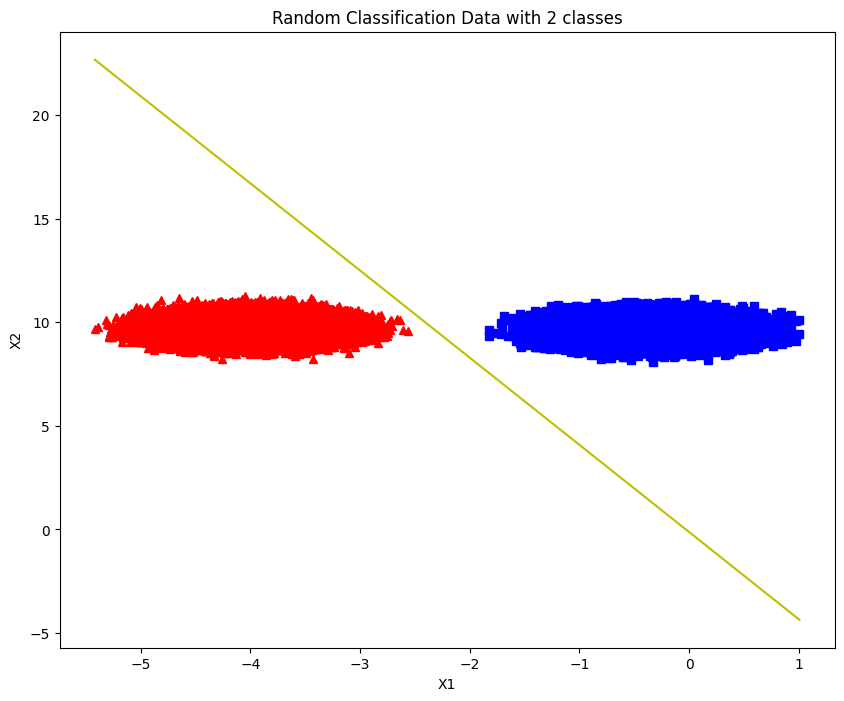

In [21]:
#Plotting
fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

# ADD THE DECISION BOUNDARY
# The Line is y=mx+c
x1 = np.array([min(X[:, 0]), max(X[:, 0])])
m = -theta[1] / theta[2]
c = -theta[0] / theta[2]
x2 = m * x1 + c
plt.plot(x1, x2, 'y-')